<a href="https://colab.research.google.com/github/Andrea-Coa/dermis/blob/main/eda/Skin_deffects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Facial Skin Impurity Analysis**

La data disponible en https://universe.roboflow.com/phamphong/facial-skin

# Cargar datos y lib

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
notebook_path = '/content/drive/Shared drives/Desarrollo/'

In [4]:
!ls "{notebook_path}"

facial_skin.zip     README.roboflow.txt       Skin_deffects.ipynb
files		    skin_defects.csv	      train
README.dataset.txt  skin_deffects_angles.zip  valid


In [5]:
zip_files = ['facial_skin.zip', 'skin_deffects_angles.zip']

Descomentar para la primera vez que se vaya a correr

In [7]:
# for zip_file_name in zip_files:
#   zip_file_path = os.path.join(notebook_path, zip_file_name)
#   if os.path.exists(zip_file_path):
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(notebook_path)
#     print(f"Extracted {zip_file_name} to {notebook_path}")
#   else:
#     print(f"Zip file not found: {zip_file_path}")

In [8]:
base_data_path = notebook_path
train_data_path = os.path.join(base_data_path, 'train')
test_data_path = os.path.join(base_data_path, 'valid')

train_csv_filename = '_tclasses.csv'
test_csv_filename = '_vclasses.csv'

train_data_file = os.path.join(train_data_path, train_csv_filename)
test_data_file = os.path.join(test_data_path, test_csv_filename)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [9]:
# cargar data train
if os.path.exists(train_data_file):
  df_train = pd.read_csv(train_data_file)
  print(f"Train data loaded from: {train_data_file}")
else:
  print(f"Train data file not found: {train_data_file}")
  print(f"Files in train directory ({train_data_path}):")
  !ls "{train_data_path}"

Train data loaded from: /content/drive/Shared drives/Desarrollo/train/_tclasses.csv


In [10]:
# cargar data valid
if os.path.exists(test_data_file):
  df_test = pd.read_csv(test_data_file)
  print(f"Test data loaded from: {test_data_file}")
else:
  print(f"Test data file not found: {test_data_file}")
  print(f"Files in test directory ({test_data_path}):")
  !ls "{test_data_path}"

Test data loaded from: /content/drive/Shared drives/Desarrollo/valid/_vclasses.csv


In [11]:
if os.path.exists(test_data_file):
  df_test = pd.read_csv(test_data_file)
  print(f"Test data loaded from: {test_data_file}")
else:
  print(f"Test data file not found: {test_data_file}")
  print(f"Files in test directory ({test_data_path}):")
  !ls "{test_data_path}"

Test data loaded from: /content/drive/Shared drives/Desarrollo/valid/_vclasses.csv


In [12]:
if not df_train.empty and not df_test.empty:
  df_train['source'] = 'train'
  df_test['source'] = 'test'

  # Concatenar data de valid y train
  df_combined = pd.concat([df_train, df_test], ignore_index=True)
  print("\nTrain and Test data combined into a single DataFrame:")
  print(df_combined.head())
  print(f"\nCombined DataFrame shape: {df_combined.shape}")
elif not df_train.empty:
    print("\nOnly train data available.")
    df_combined = df_train.copy()
    df_combined['source'] = 'train'
    print(df_combined.head())
    print(f"\nCombined DataFrame shape: {df_combined.shape}")
elif not df_test.empty:
    print("\nOnly test data available.")
    df_combined = df_test.copy()
    df_combined['source'] = 'test'
    print(df_combined.head())
    print(f"\nCombined DataFrame shape: {df_combined.shape}")
else:
  print("\nNeither train nor test data files were found. Cannot create a combined DataFrame.")


Train and Test data combined into a single DataFrame:
                                            filename  3  Dark Circle  \
0  flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...  1            0   
1    320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg  0            0   
2    152_jpg.rf.61425a4aa5e389e80822958ca073f685.jpg  0            1   
3  ff4caac1ca949c8cb912223a6aeb81d0_jpg.rf.291ebb...  0            0   
4    362_jpg.rf.53972f36b646dbd49bcb2fdab7d54fd6.jpg  0            0   

   Dark circle  Eyebag  acne scar  blackhead  blackheads  dark spot  darkspot  \
0            0       0          0          0           0          0         0   
1            0       0          0          0           0          0         0   
2            0       0          0          0           0          0         0   
3            0       0          0          0           0          0         0   
4            0       0          0          0           0          0         0   

   ...  melasma  nodules 

# Limpiar data

In [347]:
df_annotations = df_combined.copy()

In [348]:
df_annotations.head()

,filename,3,Dark Circle,Dark circle,Eyebag,acne scar,blackhead,blackheads,dark spot,darkspot,...,melasma,nodules,papules,pustules,skinredness,vascular,whitehead,whiteheads,wrinkle,source
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
2,152_jpg.rf.61425a4aa5e389e80822958ca073f685.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,ff4caac1ca949c8cb912223a6aeb81d0_jpg.rf.291ebb...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,362_jpg.rf.53972f36b646dbd49bcb2fdab7d54fd6.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train


In [349]:
df_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     997 non-null    object
 1   3            997 non-null    int64 
 2   Dark Circle  997 non-null    int64 
 3   Dark circle  997 non-null    int64 
 4   Eyebag       997 non-null    int64 
 5   acne scar    997 non-null    int64 
 6   blackhead    997 non-null    int64 
 7   blackheads   997 non-null    int64 
 8   dark spot    997 non-null    int64 
 9   darkspot     997 non-null    int64 
 10  freckle      997 non-null    int64 
 11  melasma      997 non-null    int64 
 12  nodules      997 non-null    int64 
 13  papules      997 non-null    int64 
 14  pustules     997 non-null    int64 
 15  skinredness  997 non-null    int64 
 16  vascular     997 non-null    int64 
 17  whitehead    997 non-null    int64 
 18  whiteheads   997 non-null    int64 
 19  wrinkle      997 non-null    

In [350]:
null_percentages = df_annotations.isnull().sum() / len(df_annotations) * 100
null_columns_with_nulls = null_percentages[null_percentages > 0]
null_columns_with_nulls

,0


### **Variables Dark Circle**

In [351]:
df_annotations['dark_circle'] = df_annotations['Dark Circle'] + df_annotations['Dark circle']
df_annotations['dark_circle'] = df_annotations['dark_circle'].apply(lambda x: 1 if x > 0 else x)

In [352]:
df_dark_circle_ones = df_annotations[df_annotations['dark_circle'] == 1]
df_dark_circle_ones[['Dark Circle', 'Dark circle', 'dark_circle']]

,Dark Circle,Dark circle,dark_circle
2,1,0,1
5,1,0,1
19,1,0,1
29,1,0,1
31,1,0,1
...,...,...,...
978,1,0,1
981,1,0,1
988,1,0,1
989,1,0,1


In [353]:
df_annotations = df_annotations.drop(['Dark Circle', 'Dark circle'], axis=1)
df_annotations.head(2)

,filename,3,Eyebag,acne scar,blackhead,blackheads,dark spot,darkspot,freckle,melasma,nodules,papules,pustules,skinredness,vascular,whitehead,whiteheads,wrinkle,source,dark_circle
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,train,0
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,train,0


### **Variable Blackhead**

In [354]:
df_annotations['black_head'] = df_annotations['blackhead'] + df_annotations['blackheads']
df_annotations['black_head'] = df_annotations['black_head'].apply(lambda x: 1 if x > 0 else x)

In [355]:
df_annotations = df_annotations.drop(['blackhead', 'blackheads'], axis=1)

In [356]:
df_annotations.head(2)

,filename,3,Eyebag,acne scar,dark spot,darkspot,freckle,melasma,nodules,papules,pustules,skinredness,vascular,whitehead,whiteheads,wrinkle,source,dark_circle,black_head
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,train,0,0
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,train,0,0


### **White heads**

In [357]:
df_annotations['white_head'] = df_annotations['whitehead'] + df_annotations['whiteheads']
df_annotations['white_head'] = df_annotations['white_head'].apply(lambda x: 1 if x > 0 else x)

In [358]:
df_annotations = df_annotations.drop(['whitehead', 'whiteheads'], axis=1)

In [359]:
df_annotations.head(2)

,filename,3,Eyebag,acne scar,dark spot,darkspot,freckle,melasma,nodules,papules,pustules,skinredness,vascular,wrinkle,source,dark_circle,black_head,white_head
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,0,0,0,0,train,0,0,0
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,train,0,0,0


### **Variable Dark spot**

In [360]:
df_annotations['dark_spot'] = df_annotations['dark spot'] + df_annotations['darkspot']
df_annotations['dark_spot'] = df_annotations['dark_spot'].apply(lambda x: 1 if x > 0 else x)

In [361]:
df_annotations = df_annotations.drop(['dark spot', 'darkspot'], axis=1)

In [362]:
df_annotations.head(2)

,filename,3,Eyebag,acne scar,freckle,melasma,nodules,papules,pustules,skinredness,vascular,wrinkle,source,dark_circle,black_head,white_head,dark_spot
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,0,0,train,0,0,0,0
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,0,1,train,0,0,0,0


In [363]:
df_annotations = df_annotations.rename(columns={
    'Eyebag':   'eye_bag',
    'acne scar': 'acne_scar'

})

df_annotations.head(2)


,filename,3,eye_bag,acne_scar,freckle,melasma,nodules,papules,pustules,skinredness,vascular,wrinkle,source,dark_circle,black_head,white_head,dark_spot
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,0,0,train,0,0,0,0
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,0,1,train,0,0,0,0


###**Variable '3'**

In [364]:
#columnas que tienen a la variable 3
selected_rows = df_annotations[df_annotations['3'] == 1]
len(selected_rows)

157

In [365]:
image_files_to_show = selected_rows['filename'].astype(str).tolist()

In [366]:
image_files_to_show = selected_rows['filename']

In [367]:
image_files_to_show

,filename
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...
7,fla-20-_JPG.rf.3039e396d64fb8fb2962ffbcef79176...
8,flnv1-13-_jpg.rf.4eeccd6033665671b404cab1cb7b4...
9,fla-22-_JPG.rf.00bb516023d6016764769a6fdcf14e0...
11,flnv1-12-_jpg.rf.85d8b699f2087ef8b083ad0ea2ecb...
...,...
949,fla-32-_JPG.rf.cb9b59278c260e6fd3694e18d9ffbd2...
955,fla-34-_JPG.rf.d9028c200767fe65da522e68d54d845...
956,fla-30-_JPG.rf.d1b923a54ee0cb876817ed834fe9344...
960,fla-28-_JPG.rf.841c91bd00a382a1d6e0b2212b7dfa4...


In [368]:
train_images_dir = os.path.join(notebook_path, 'train')

Showing 5 images with '3' == 1:

Displaying: flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46a8.jpg


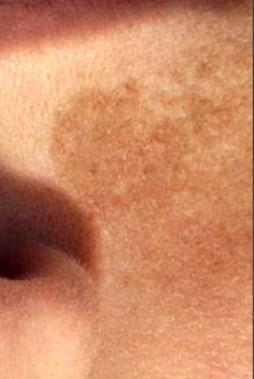


Displaying: fla-20-_JPG.rf.3039e396d64fb8fb2962ffbcef79176a.jpg


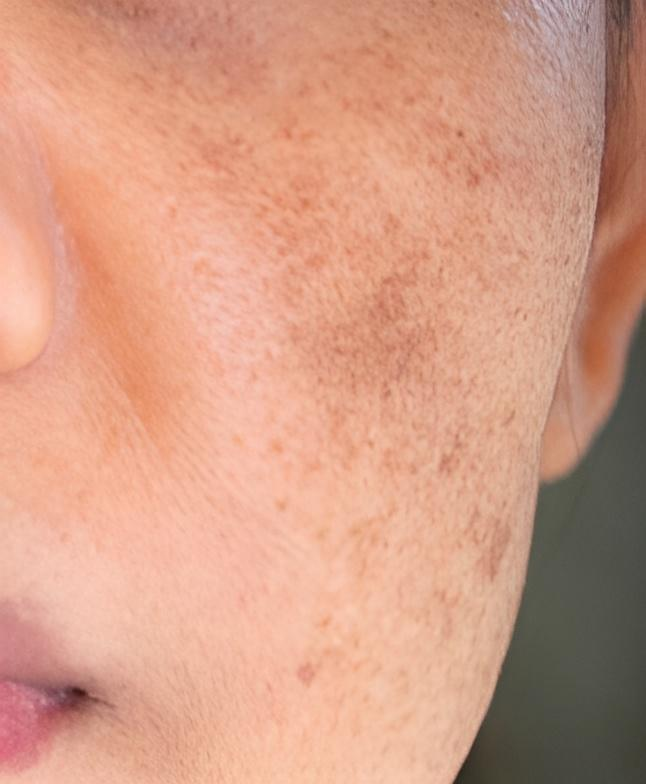


Displaying: flnv1-13-_jpg.rf.4eeccd6033665671b404cab1cb7b423b.jpg


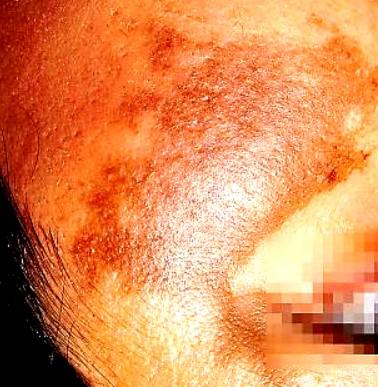


Displaying: fla-22-_JPG.rf.00bb516023d6016764769a6fdcf14e05.jpg


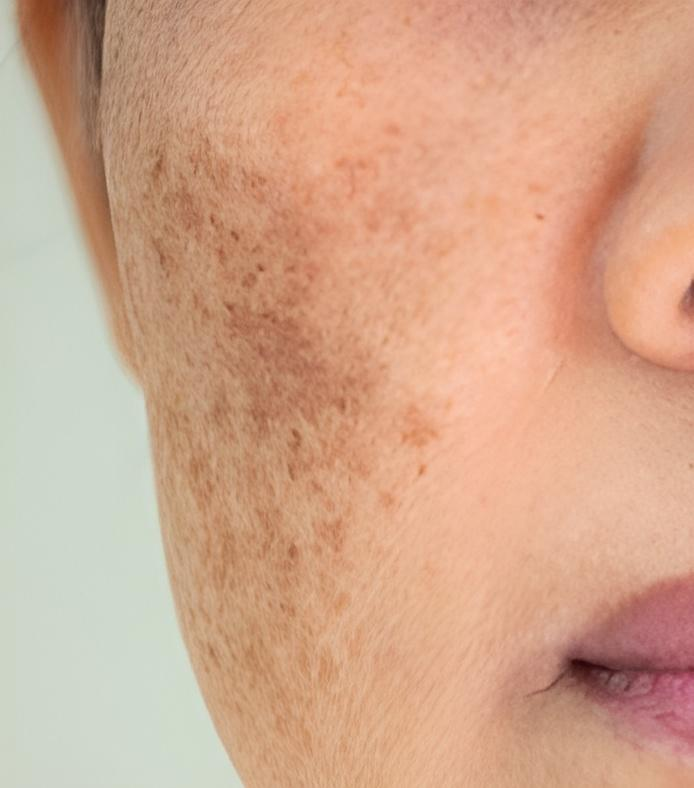


Displaying: flnv1-12-_jpg.rf.85d8b699f2087ef8b083ad0ea2ecbe3c.jpg


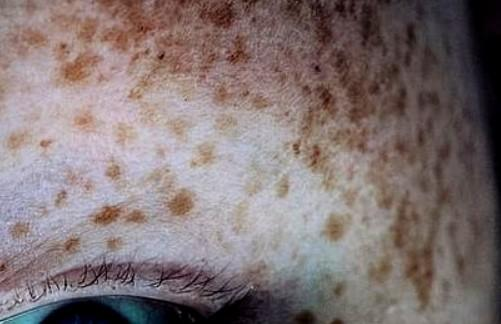

In [369]:
from IPython.display import display, Image
import os

num_images_to_show = 5
images_to_display = selected_rows.head(num_images_to_show)

print(f"Showing {len(images_to_display)} images with '3' == 1:")

for index, row in images_to_display.iterrows():
    filename = row['filename']
    image_dir = train_images_dir

    image_path = os.path.join(image_dir, filename)

    if os.path.exists(image_path):
        print(f"\nDisplaying: {filename}")
        display(Image(filename=image_path))
    else:
        print(f"Image not found: {image_path}")

Displaying: mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg


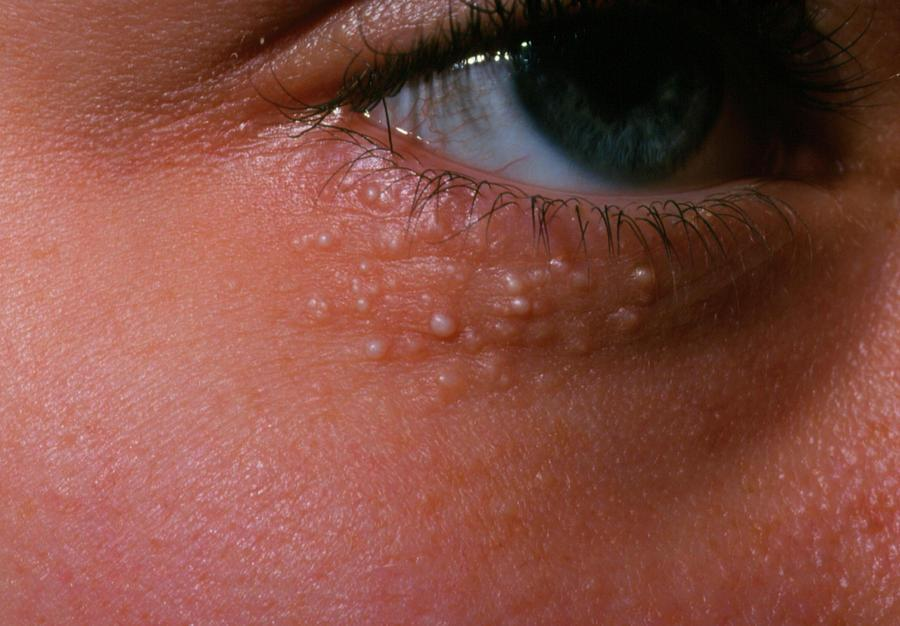

In [370]:
image_dir = os.path.join(notebook_path, 'train')
image_path = os.path.join(image_dir, 'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg')
if os.path.exists(image_path):
  print(f"Displaying: {'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg'}")
  display(Image(filename=image_path))
else:
  print(f"Image not found: {image_path}")

In [371]:
rows_to_drop = df_annotations[df_annotations['filename'] == 'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg']

if not rows_to_drop.empty:
    # Drop the identified rows from the DataFrame
    df_annotations = df_annotations[df_annotations['filename'] != 'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg'].copy()
    print("Rows with filename 'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg' dropped.")
    print(f"New DataFrame shape: {df_annotations.shape}")
else:
    print("Filename 'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg' not found in the DataFrame.")

Rows with filename 'mila-7-_jpg.rf.93d43735cd26d2d22bf206c4750d0a2f.jpg' dropped.
New DataFrame shape: (996, 17)


In [372]:
df_annotations = df_annotations.rename(columns={
    '3': 'stains'
})

df_annotations.head(2)

,filename,stains,eye_bag,acne_scar,freckle,melasma,nodules,papules,pustules,skinredness,vascular,wrinkle,source,dark_circle,black_head,white_head,dark_spot
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,1,0,0,0,0,0,0,0,0,0,0,train,0,0,0,0
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,0,0,1,train,0,0,0,0


In [373]:
df_annotations['melasma_stains'] = df_annotations['melasma'] + df_annotations['stains']
df_annotations['melasma_stains'] = df_annotations['melasma_stains'].apply(lambda x: 1 if x > 0 else x)

print("Rows where 'melasma' is 1 and their 'stains' and 'melasma_stains' values:")
display(df_annotations[df_annotations['melasma'] == 1][['filename', 'melasma', 'stains', 'melasma_stains']].head())

Rows where 'melasma' is 1 and their 'stains' and 'melasma_stains' values:


,filename,melasma,stains,melasma_stains
129,levle0_279_jpg.rf.a1b04bc03944df3811d8b6f8d753...,1,0,1
423,levle0_280_jpg.rf.51acee6fe9d83dec6e5010ce75a4...,1,0,1


In [374]:
df_annotations = df_annotations.drop(['melasma', 'stains'], axis=1)
df_annotations = df_annotations.rename(columns={'melasma_stains': 'stains'})
df_annotations.head(2)

,filename,eye_bag,acne_scar,freckle,nodules,papules,pustules,skinredness,vascular,wrinkle,source,dark_circle,black_head,white_head,dark_spot,stains
0,flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...,0,0,0,0,0,0,0,0,0,train,0,0,0,0,1
1,320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg,0,0,0,0,0,0,0,0,1,train,0,0,0,0,0


# **Gráficos**

In [375]:
df_annotations.columns

Index(['filename', 'eye_bag', 'acne_scar', 'freckle', 'nodules', 'papules',
       'pustules', 'skinredness', 'vascular', 'wrinkle', 'source',
       'dark_circle', 'black_head', 'white_head', 'dark_spot', 'stains'],
      dtype='object')

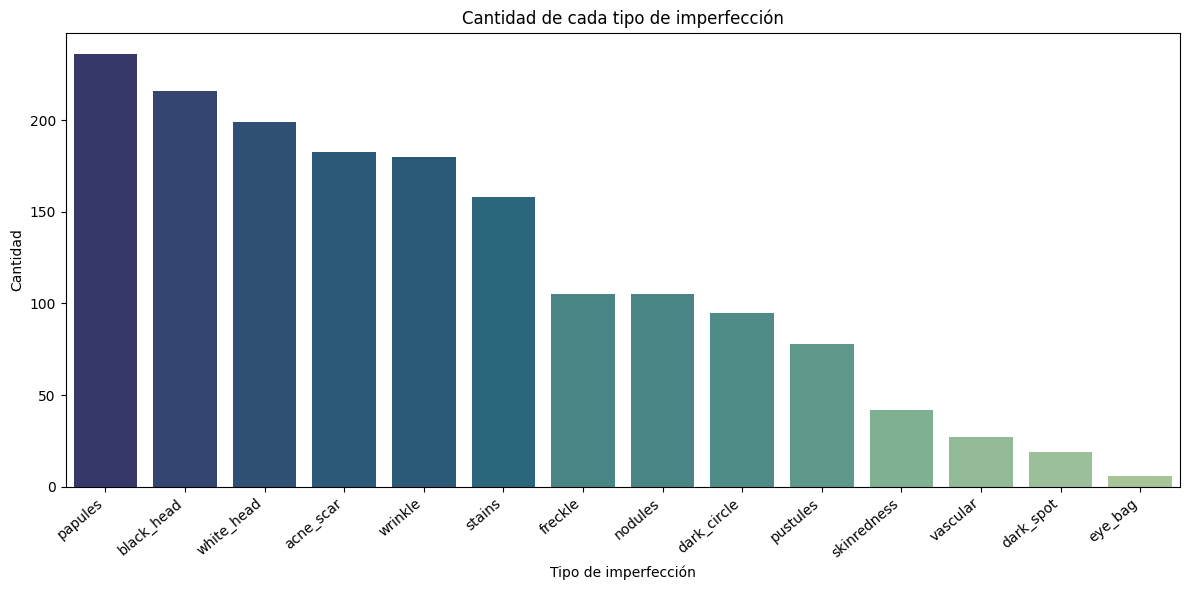

In [377]:
columns_to_sum = [col for col in df_annotations.columns if col not in ['filename', 'source']]
type_counts = df_annotations[columns_to_sum].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='crest', hue=type_counts, legend=False)
plt.title('Cantidad de cada tipo de imperfección')
plt.xlabel('Tipo de imperfección')
plt.ylabel('Cantidad')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

In [378]:
print(df_annotations.head())

                                            filename  eye_bag  acne_scar  \
0  flnv1-1-_jpg.rf.098d9274e038c584620f30427bee46...        0          0   
1    320_jpg.rf.271f4817d08d9c71a78ea3d3dc52733d.jpg        0          0   
2    152_jpg.rf.61425a4aa5e389e80822958ca073f685.jpg        0          0   
3  ff4caac1ca949c8cb912223a6aeb81d0_jpg.rf.291ebb...        0          0   
4    362_jpg.rf.53972f36b646dbd49bcb2fdab7d54fd6.jpg        0          0   

   freckle  nodules  papules  pustules  skinredness  vascular  wrinkle source  \
0        0        0        0         0            0         0        0  train   
1        0        0        0         0            0         0        1  train   
2        0        0        0         0            0         0        0  train   
3        1        0        0         0            0         0        0  train   
4        0        0        0         0            0         0        1  train   

   dark_circle  black_head  white_head  dark_spot  stain

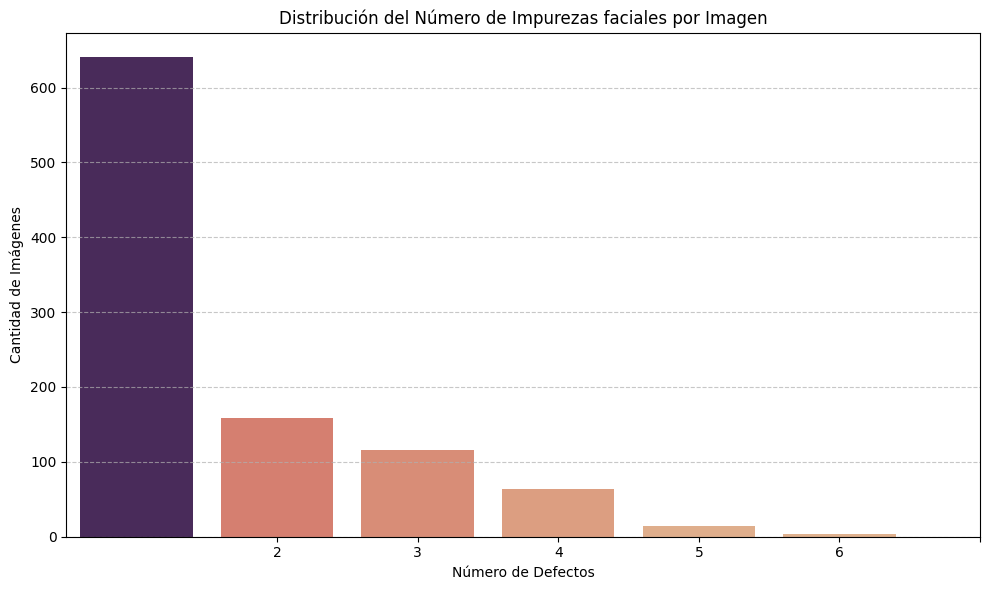


Conteo de imágenes por número de defectos:


,count
1,641
2,158
3,116
4,64
5,14
6,3


In [379]:
num_defects_per_image = df_annotations[columns_to_sum].sum(axis=1)
defect_counts = num_defects_per_image.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=defect_counts.index, y=defect_counts.values, palette='flare', hue=defect_counts, legend=False)
plt.title('Distribución del Número de Impurezas faciales por Imagen')
plt.xlabel('Número de Defectos')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(defect_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nConteo de imágenes por número de defectos:")
defect_counts

**Heatmap**

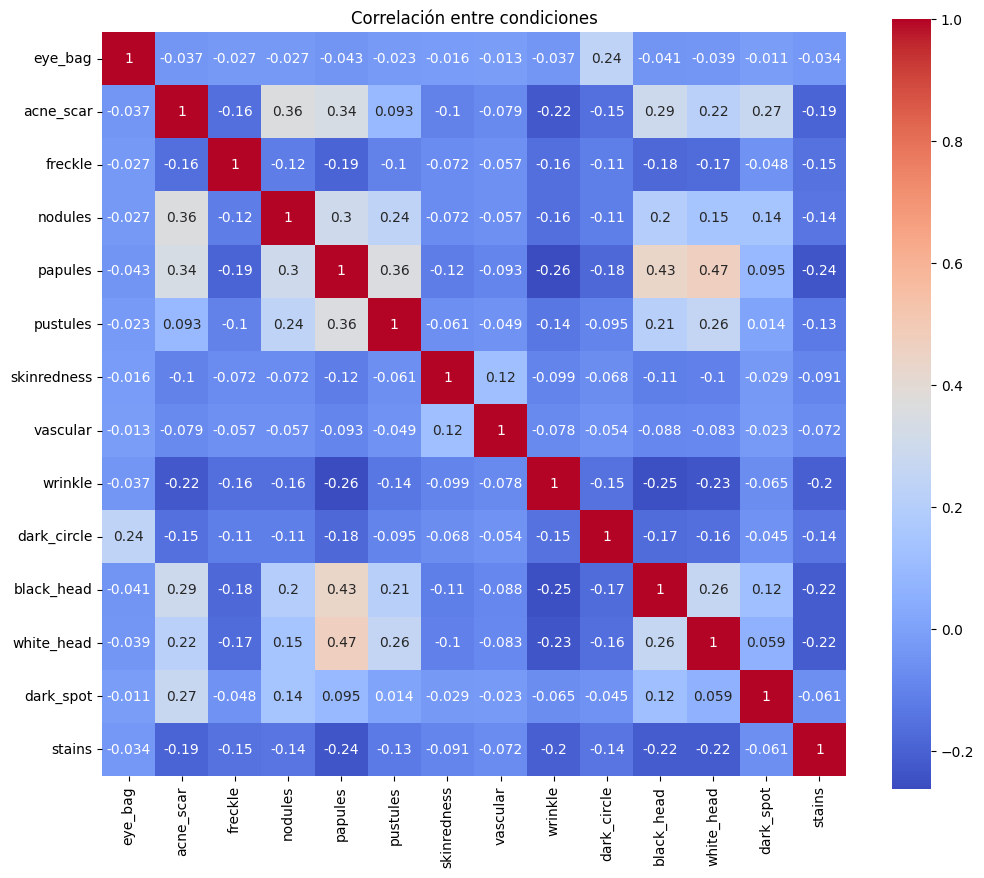

In [380]:
cols = df_annotations.columns.drop(['filename', 'source'])
df_conditions = df_annotations[cols]

corr_matrix = df_conditions.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlación entre condiciones')
plt.show()


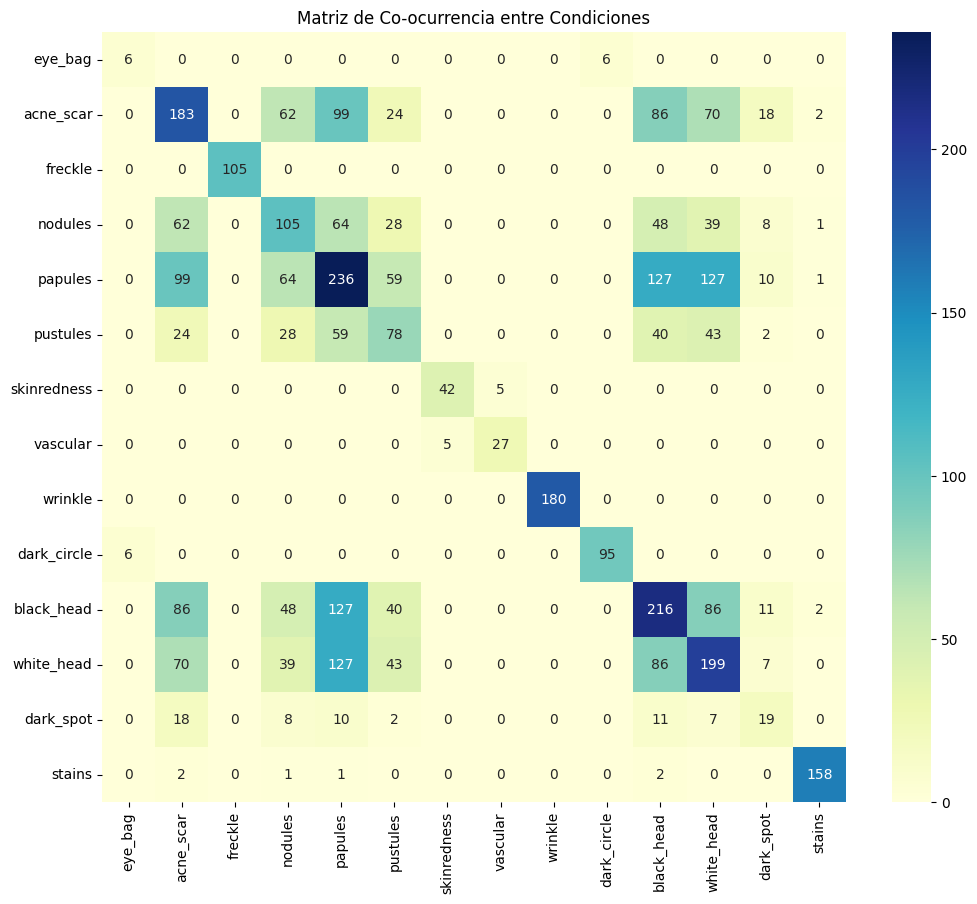

In [381]:
df_cond = df_annotations.drop(columns=["filename", "source"])
co_occur = np.dot(df_cond.T, df_cond)

co_occur_df = pd.DataFrame(co_occur, index=df_cond.columns, columns=df_cond.columns)

plt.figure(figsize=(12, 10))
sns.heatmap(co_occur_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Co-ocurrencia entre Condiciones')
plt.show()


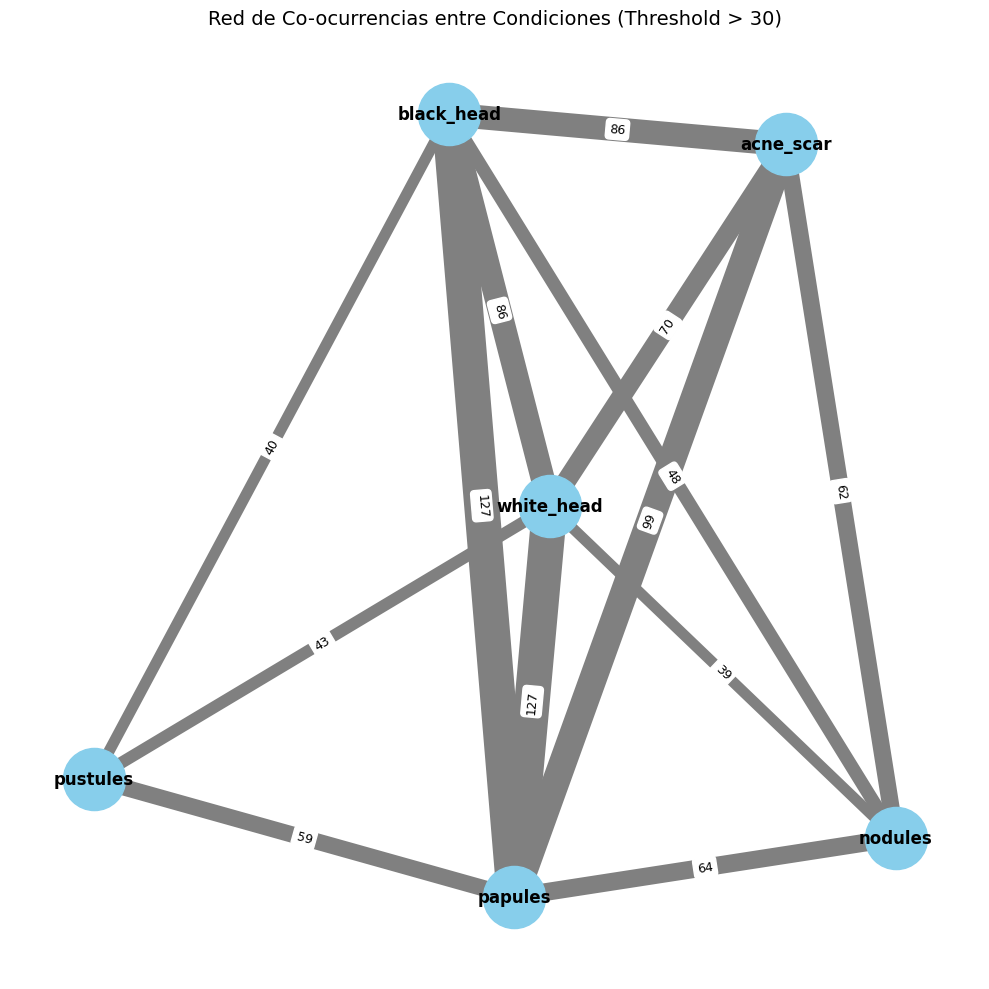

In [408]:
import networkx as nx
df_cond = df_annotations.drop(columns=["filename", "source"])
co_occur = np.dot(df_cond.T, df_cond)
co_occur_df = pd.DataFrame(co_occur, index=df_cond.columns, columns=df_cond.columns)

threshold = 30
G = nx.Graph()

# Agregar nodos y aristas con pesos mayores al threshold
for i in range(len(co_occur_df.columns)):
    for j in range(i + 1, len(co_occur_df.columns)):
        weight = co_occur_df.iloc[i, j]
        if weight > threshold:
            G.add_edge(co_occur_df.columns[i], co_occur_df.columns[j], weight=weight)

# Paso 3: Ajustar visualización
plt.figure(figsize=(10, 10))

# Usamos un layout más separado y fijo
pos = nx.spring_layout(G, seed=42, k=0.9)

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')

# Dibujar aristas con grosor según peso
edges = G.edges(data=True)
weights = [e[2]['weight'] for e in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w / 5 for w in weights], edge_color='grey')

# Dibujar etiquetas
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Dibujar pesos de aristas opcional
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Red de Co-ocurrencias entre Condiciones (Threshold > 30)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


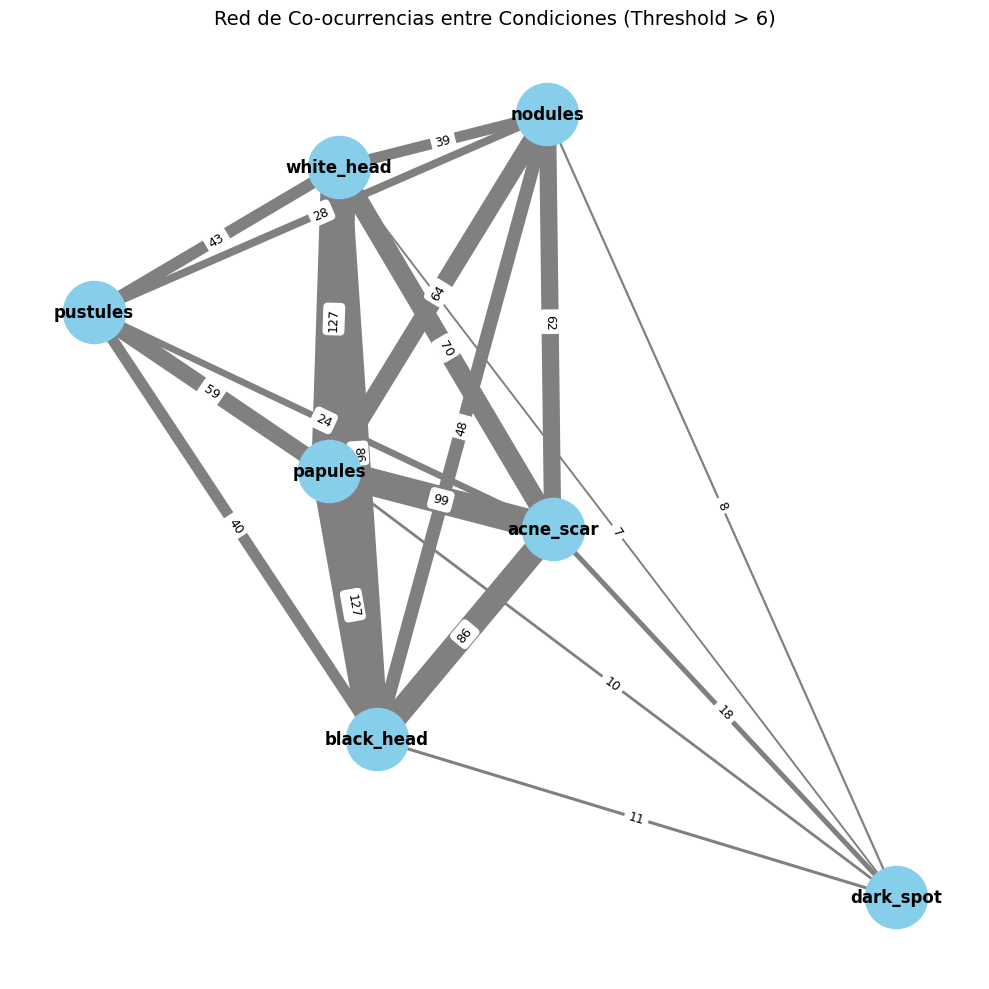

In [409]:
threshold = 6
G = nx.Graph()

# Agregar nodos y aristas con pesos mayores al threshold
for i in range(len(co_occur_df.columns)):
    for j in range(i + 1, len(co_occur_df.columns)):
        weight = co_occur_df.iloc[i, j]
        if weight > threshold:
            G.add_edge(co_occur_df.columns[i], co_occur_df.columns[j], weight=weight)

# Paso 3: Ajustar visualización
plt.figure(figsize=(10, 10))

# Usamos un layout más separado y fijo
pos = nx.spring_layout(G, seed=42, k=0.9)

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')

# Dibujar aristas con grosor según peso
edges = G.edges(data=True)
weights = [e[2]['weight'] for e in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w / 5 for w in weights], edge_color='grey')

# Dibujar etiquetas
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Dibujar pesos de aristas opcional
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Red de Co-ocurrencias entre Condiciones (Threshold > 6)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


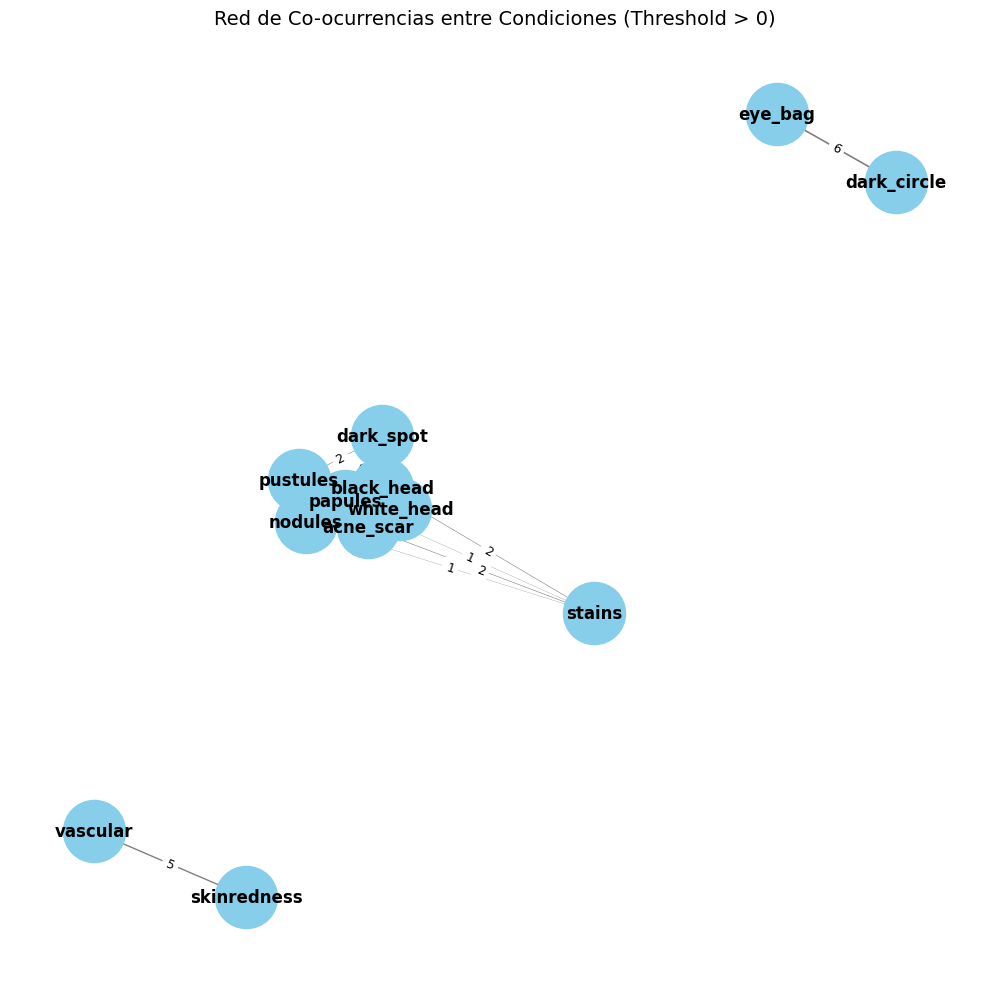

In [410]:
threshold = 0
G = nx.Graph()

# Agregar nodos y aristas con pesos mayores al threshold
for i in range(len(co_occur_df.columns)):
    for j in range(i + 1, len(co_occur_df.columns)):
        weight = co_occur_df.iloc[i, j]
        if weight > threshold:
            G.add_edge(co_occur_df.columns[i], co_occur_df.columns[j], weight=weight)

# Paso 3: Ajustar visualización
plt.figure(figsize=(10, 10))

# Usamos un layout más separado y fijo
pos = nx.spring_layout(G, seed=42, k=0.9)

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')

# Dibujar aristas con grosor según peso
edges = G.edges(data=True)
weights = [e[2]['weight'] for e in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w / 5 for w in weights], edge_color='grey')

# Dibujar etiquetas
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Dibujar pesos de aristas opcional
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Red de Co-ocurrencias entre Condiciones (Threshold > 0)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [411]:
output_csv_path = os.path.join(notebook_path, '_annotations.csv')
df_annotations.to_csv(output_csv_path, index=False)

print(f"\ndf_annotations saved successfully to: {output_csv_path}")
!ls "{notebook_path}" | grep _annotations.csv


df_annotations saved successfully to: /content/drive/Shared drives/Desarrollo/_annotations.csv
_annotations.csv
